In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the data

In [29]:
df_train = pd.read_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\train.csv")
df_test = pd.read_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\test.csv")

In [30]:
# Merging them together
df_survived = df_train['Survived']
df_train.drop(columns='Survived', inplace=True)
df = pd.concat([df_train, df_test])

In [27]:
df.isnull()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,True,False,False,False,False,True,False


In [31]:
# Dropping the null value in Age
values = {'Age':df['Age'].mean()}
df.fillna(value=values, inplace=True)

In [29]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,NaN,S


In [54]:
df['Cabin'].count()

295

In [32]:
#Since out of 1309 rows only, 295 of Cabins are present, we are dropping the Cabin
df.drop(columns='Cabin', inplace=True)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,29.881138,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,29.881138,0,0,359309,8.0500,S


In [33]:
null_columns = df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Fare        1
Embarked    2
dtype: int64

In [34]:
df.groupby(['Embarked']).count()
# S is the maximum occurring value, hence we are going to fill na of embarked with S and na of fare with average value

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Embarked,,,,,,,,,
C,270,270,270,270,270,270,270,270,270
Q,123,123,123,123,123,123,123,123,123
S,914,914,914,914,914,914,914,914,913


In [35]:
values = {'Fare':df['Fare'].mean(), 'Embarked':'S'}
df.fillna(value=values, inplace=True)

In [15]:
df.isnull().any()
# Now the null values are omitted from our dataframe

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [36]:
# Arranging the name column in suitable form
def nameselect(x):
    a = x.split(" ")
    for i in range(len(a)):
        if a[i][-1]==',':
            if a[i+1][-1] == '.':
                return a[i+1] 
            else:
                return a[i+1]+" "+a[i+2]

def ticketselect(x):
    a = x.split(" ")
    if len(a)>1:
        return a[0]
    else:
        return "PC"
    
df['Name_title'] = df['Name'].apply(lambda x: nameselect(x))
df['Ticket_prefix'] = df['Ticket'].apply(lambda x: ticketselect(x))
df['Count'] = 1
df.groupby(['Ticket_prefix']).count().sort_values(['Count'], ascending=False)
# Here we are using PC as the substition to ticket having no ticket_prefix

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_title,Count
Ticket_prefix,,,,,,,,,,,,
PC,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053,1053
C.A.,46,46,46,46,46,46,46,46,46,46,46,46
SOTON/O.Q.,16,16,16,16,16,16,16,16,16,16,16,16
STON/O,14,14,14,14,14,14,14,14,14,14,14,14
W./C.,14,14,14,14,14,14,14,14,14,14,14,14
CA.,12,12,12,12,12,12,12,12,12,12,12,12
A/5,12,12,12,12,12,12,12,12,12,12,12,12
SC/PARIS,11,11,11,11,11,11,11,11,11,11,11,11
CA,10,10,10,10,10,10,10,10,10,10,10,10


In [37]:
df.drop(columns=['Count','Ticket','Name'], inplace=True)
ser = pd.Series(df['Age'])
df['Age'] = pd.DataFrame(np.round(np.array(df['Age'])))
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title,Ticket_prefix
0,1,3,male,22.0,1,0,7.2500,S,Mr.,A/5
1,2,1,female,38.0,1,0,71.2833,C,Mrs.,PC
2,3,3,female,26.0,0,0,7.9250,S,Miss.,STON/O2.
3,4,1,female,35.0,1,0,53.1000,S,Mrs.,PC
4,5,3,male,35.0,0,0,8.0500,S,Mr.,PC
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30.0,0,0,8.0500,S,Mr.,A.5.
414,1306,1,female,44.0,0,0,108.9000,C,Dona.,PC
415,1307,3,male,30.0,0,0,7.2500,S,Mr.,SOTON/O.Q.
416,1308,3,male,34.0,0,0,8.0500,S,Mr.,PC


In [38]:
# Splitting the data into train and test as original
new_df_train = df.iloc[:891,:]
new_df_train['Survived'] = df_survived
new_df_test = df.iloc[891:,:]

<ipython-input-38-ceb0eb4af63b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df_train['Survived'] = df_survived


In [39]:
# Saving the new datasets
new_df_train.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\new_train.csv", index=False)
new_df_test.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\new_test.csv", index=False)

In [2]:
# Loading from new datasets
df_train = pd.read_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\new_train.csv")
df_test = pd.read_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\new_test.csv")

In [41]:
df_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title,Ticket_prefix,Survived
0,1,3,male,22.0,1,0,7.2500,S,Mr.,A/5,0
1,2,1,female,38.0,1,0,71.2833,C,Mrs.,PC,1
2,3,3,female,26.0,0,0,7.9250,S,Miss.,STON/O2.,1
3,4,1,female,35.0,1,0,53.1000,S,Mrs.,PC,1
4,5,3,male,35.0,0,0,8.0500,S,Mr.,PC,0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,S,Rev.,PC,0
887,888,1,female,19.0,0,0,30.0000,S,Miss.,PC,1
888,889,3,female,30.0,1,2,23.4500,S,Miss.,W./C.,0
889,890,1,male,26.0,0,0,30.0000,C,Mr.,PC,1


## Converting string forms to integer forms

In [6]:
a = list(df_train['Name_title'].unique())
b = list(df_train['Sex'].unique())
c = list(df_train['Embarked'].unique())
d = list(df_train['Ticket_prefix'].unique())
Namenumber={}; Sexnumber={}; Embarkednumber={}; Ticket_prefixnumber={}
list1=[a,b,c,d]
for i in range(len(a)):
    Namenumber[a[i]] = i
for i in range(len(b)):    
    Sexnumber[b[i]] = i
for i in range(len(c)):
    Embarkednumber[c[i]] = i
for i in range(len(d)):
    Ticket_prefixnumber[d[i]] = i
df_train['Name_title'] = df_train['Name_title'].apply(lambda x: Namenumber[x])
df_train['Sex'] = df_train['Sex'].apply(lambda x: Sexnumber[x])
df_train['Embarked'] = df_train['Embarked'].apply(lambda x: Embarkednumber[x])
df_train['Ticket_prefix'] = df_train['Ticket_prefix'].apply(lambda x: Ticket_prefixnumber[x])

In [7]:
a = list(df_test['Name_title'].unique())
b = list(df_test['Sex'].unique())
c = list(df_test['Embarked'].unique())
d = list(df_test['Ticket_prefix'].unique())
Namenumber={}; Sexnumber={}; Embarkednumber={}; Ticket_prefixnumber={}
list1=[a,b,c,d]
for i in range(len(a)):
    Namenumber[a[i]] = i
for i in range(len(b)):    
    Sexnumber[b[i]] = i
for i in range(len(c)):
    Embarkednumber[c[i]] = i
for i in range(len(d)):
    Ticket_prefixnumber[d[i]] = i
df_test['Name_title'] = df_test['Name_title'].apply(lambda x: Namenumber[x])
df_test['Sex'] = df_test['Sex'].apply(lambda x: Sexnumber[x])
df_test['Embarked'] = df_test['Embarked'].apply(lambda x: Embarkednumber[x])
df_test['Ticket_prefix'] = df_test['Ticket_prefix'].apply(lambda x: Ticket_prefixnumber[x])

## Modelling our data

In [8]:
train_y = df_train['Survived']
train_x = df_train.drop(columns='Survived')
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(train_x, train_y)

c:\users\santo\pycharmprojects\webscraping\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Saving the prediction

In [48]:
df_test['Survived'] = log.predict(df_test)
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_title,Ticket_prefix,Survived
0,892,3,0,22.0,0,0,7.8292,0,0,0,0
1,893,3,1,38.0,1,0,7.0000,1,1,0,1
2,894,2,0,26.0,0,0,9.6875,0,0,0,0
3,895,3,0,35.0,0,0,8.6625,1,0,0,0
4,896,3,1,35.0,1,1,12.2875,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,0,30.0,0,0,8.0500,1,0,33,0
414,1306,1,1,44.0,0,0,108.9000,2,8,0,1
415,1307,3,0,30.0,0,0,7.2500,1,0,10,0
416,1308,3,0,34.0,0,0,8.0500,1,0,0,0


In [51]:
df_result = df_test[['PassengerId','Survived']]
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result.csv", index=False)

In [52]:
df_result
# This got an score of 0.74880, hence trying other models.

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## Trying other models

In [88]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(train_x, train_y)
df_result = pd.DataFrame(df_test['PassengerId'])
df_result['Survived'] = svc.predict(df_test)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result2.csv", index=False)
svc.predict(df_test)
# This got an score of 0.77751.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2, interaction_only=True)
poly_train_x = pf.fit_transform(train_x)
poly_test_x = pf.fit_transform(df_test)


In [8]:
from sklearn.svm import SVC
svc = SVC(kernel='poly')
svc.fit(poly_train_x, train_y)
svc.predict(poly_test_x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

In [9]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(poly_train_x, train_y)
log.predict(poly_test_x)
df_result = pd.DataFrame(df_test['PassengerId'])
df_result['Survived'] = log.predict(poly_test_x)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result3.csv", index=False)
# Score is less than before which is 0.73923

c:\users\santo\pycharmprojects\webscraping\venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,

In [15]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(penalty='l1', solver='liblinear')
log.fit(poly_train_x, train_y)
log.predict(poly_test_x)
df_result = pd.DataFrame(df_test['PassengerId'])
df_result['Survived'] = log.predict(poly_test_x)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result4.csv", index=False)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dec = DecisionTreeClassifier()
dec.fit(train_x, train_y)
df_result = pd.DataFrame(df_test['PassengerId'])
df_result['Survived'] = dec.predict(df_test)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result5.csv", index=False)
# Score 0.61004

In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x, train_y)
df_result = pd.DataFrame(df_test['PassengerId'])
df_result['Survived'] = gnb.predict(df_test)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result6.csv", index=False)
# Score 0.73923

Feature 0: 3.312934
Feature 1: 30.873699
Feature 2: 170.348127
Feature 3: 25.002779
Feature 4: 2.581865
Feature 5: 10.097499
Feature 6: 4518.319091
Feature 7: 11.353117
Feature 8: 238.465228
Feature 9: 71.633236


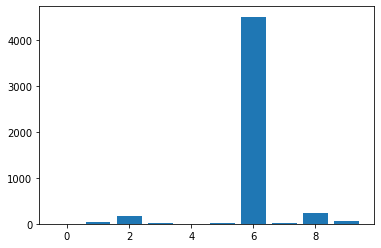

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(train_x, train_y)
X_train_fs = fs.transform(train_x)
X_test_fs = fs.transform(df_test)
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [22]:
new_train_x = train_x[['Sex', 'Fare', 'Name_title','Ticket_prefix']]
new_df_test = df_test[['Sex', 'Fare', 'Name_title', 'Ticket_prefix']]

In [23]:
from sklearn.svm import SVC
svc = SVC(kernel='linear')
svc.fit(new_train_x, train_y)
df_result = pd.DataFrame(df_test['PassengerId'])
df_result['Survived'] = svc.predict(new_df_test)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result7.csv", index=False)
svc.predict(new_df_test)
# Score is 0.76555

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(new_train_x, train_y)
df_result = pd.DataFrame(df_test['PassengerId'])
df_result['Survived'] = gnb.predict(new_df_test)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result8.csv", index=False)
gnb.predict(new_df_test)
# Score of 0.74880

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [24]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(new_train_x, train_y)
df_result = pd.DataFrame(df_test['PassengerId'])
df_result['Survived'] = log.predict(new_df_test)
df_result.to_csv(r"C:\Users\santo\PycharmProjects\MachineLearning\DataSets for ML\titanic\result9.csv", index=False)
log.predict(new_df_test)
# Score is 0.76076

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [25]:
##### 0.77751 is the highest score I obtained here